RISK MANAGEMENT

In [135]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [136]:
#Project on Risk Management where we help employees make better decision making when it comes to risk
#management based on seeing multiple variables in their life such as 
#houshold income, number of investors in family, knowledge level on
#sharemarket, investmenet experience, risk level taken, returns from
#risk taken and their reasons for investing. 

#We first do the basics such as reading the file, listing the datasets
#info. then we preprocess the data by checking for missing values and 
#dropping duplicate columns. And in order to start making an analysis
#we state the variables risk earned and risk level. We wll also take
#investment experience from the dataset and as they are given in 
#alphabets we give each a numerical value for easier analysis and we
#do the same for risk value as in the 3 values in the column risk 
#level are low, medium, high and we give 1,2,3 respectively to them
#We do the same for the column return earned for people with negative
#returns we give NaN as value, those with returns ranging from 2 numbers
#we find the average of the two numbers and if value is greater than 13 
#we add +1 to that value making it 14. Doing this makes it easier for
#the data to be analyzed. After thats done we create a formula to 
#calculate Risk Reward Ratio of an employee by dividing their return
#earned with their risk level.
#We use standardscaler to help adjust numbers on a ceertain scale to make analysis of certain numbers
#more fair. We specify which columns require the adjustment and then we apply the adjustment. Standard
#scalar first finds the average of the values and compares how much the new mean differs from the 
#original value. If closer to 0 then not much difference. If higher than original value was higher and
#vice versa.

#We train test split the data. We train the data in order to learn the relationships and trends between
#the features so it minimizes errors in predictions. After training we test the data to see how well
#it generalizes to new, unseen data (As in its already learnt the patterns and trends and can handle
#unknown data). Common testing metrics are accuracy, precision, f1-score. We perform split so data 
#doesnt learn too well where it learns noise and outliers as well making it overfitting. Train test
#split process we usually do 70-80% training data and the rest 20-30% test 

In [137]:
#project from a consulting point of view of checking the risk management of employees and give advice on how to manage risks more effectively
df = pd.read_csv('shortlist.csv')
print(df.head())

   S. No.           City Gender Marital Status            Age   Education  \
0       1       New York    Men  Never Married  Early Working   Secondary   
1       2       New York  Women        Married  Early Working      Middle   
2       3        Seattle  Women        Married  Early Working    Teritary   
3       4  San Francisco    Men  Never Married        Elderly  Uneducated   
4       5  San Francisco    Men        Married  Prime Working     Primary   

                                        Role  Number of investors in family  \
0              Marketing and Sales Executive                              2   
1        Advertising and Promotion Executive                              2   
2         Training and Development Executive                              2   
3         Training and Development Executive                              5   
4  Computer and Information System Executive                              2   

         Household Income Percentage of Investment  \
0    US$

In [138]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 19 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   S. No.                                              810 non-null    int64 
 1   City                                                810 non-null    object
 2   Gender                                              810 non-null    object
 3   Marital Status                                      810 non-null    object
 4   Age                                                 810 non-null    object
 5   Education                                           810 non-null    object
 6   Role                                                810 non-null    object
 7   Number of investors in family                       810 non-null    int64 
 8   Household Income                                    810 non-null    object
 9   Percentage

DATA PREPROCESSING

In [139]:
missing_values = df.isnull().sum()
print(missing_values)

S. No.                                                0
City                                                  0
Gender                                                0
Marital Status                                        0
Age                                                   0
Education                                             0
Role                                                  0
Number of investors in family                         0
Household Income                                      0
Percentage of Investment                              0
Source of Awareness about Investment                  0
Knowledge level about different investment product    0
Knowledge level about sharemarket                     0
Knowledge about Govt. Schemes                         0
Investment Influencer                                 0
Investment Experience                                 0
Risk Level                                            0
Return Earned                                   

In [140]:
print(df.dtypes)

S. No.                                                 int64
City                                                  object
Gender                                                object
Marital Status                                        object
Age                                                   object
Education                                             object
Role                                                  object
Number of investors in family                          int64
Household Income                                      object
Percentage of Investment                              object
Source of Awareness about Investment                  object
Knowledge level about different investment product     int64
Knowledge level about sharemarket                      int64
Knowledge about Govt. Schemes                          int64
Investment Influencer                                 object
Investment Experience                                 object
Risk Level              

In [141]:
df = df.drop_duplicates()

In [142]:
print(df.columns)

Index(['S. No.', 'City', 'Gender', 'Marital Status', 'Age', 'Education',
       'Role', 'Number of investors in family', 'Household Income',
       'Percentage of Investment', 'Source of Awareness about Investment',
       'Knowledge level about different investment product',
       'Knowledge level about sharemarket', 'Knowledge about Govt. Schemes',
       'Investment Influencer', 'Investment Experience', 'Risk Level',
       'Return Earned', 'Reason for Investment'],
      dtype='object')


In [143]:
print(df[['Return Earned', 'Risk Level']].dtypes)

Return Earned    object
Risk Level       object
dtype: object


In [144]:
print("Initial Data:")
print(df[['Return Earned', 'Risk Level']].head())

Initial Data:
     Return Earned Risk Level
0  Negative Return        Low
1        10 to 12         Low
2           1 to 4        Low
3        10 to 12         Low
4           5 to 6        Low


In [145]:
risk_calc = {'Low': 1, 'Medium': 2, 'High': 3}
df['Risk Level'] = df['Risk Level'].map(risk_calc)

In [146]:
# Mapping for 'Investment Experience'
experience_mapping = {
    'Less Than 1 Year': 1,
    '1 Year to 3 Years': 2,
    '4 Years to 6 Years': 3,
    '7 Years to 9 Years': 4,
    'Above 9 Years': 5
}
df['Investment Experience'] = df['Investment Experience'].map(experience_mapping)

# Check for NaN values after mapping
print(df['Investment Experience'].isna().sum())  # This should be 0 if all values are mapped correctly


0


In [147]:
def parse_return(value):
    if isinstance(value, str):
        if 'to' in value:
            parts = value.split(' to ')
            return (float(parts[0]) + float(parts[1])) / 2  # Average of the range
        elif 'more than' in value:
            return float(value.replace('more than ', '')) + 1  # Threshold value
        elif 'negative' in value.lower():
            return -1  # Assign a negative value
        else:
            try:
                return float(value)
            except ValueError:
                return None  # Handle unexpected cases
    return value

df['Return Earned'] = df['Return Earned'].apply(parse_return)

In [148]:
if 'Return Earned' in df.columns and 'Risk Level' in df.columns:
    # Calculate 'Risk Reward Ratio
    df['Risk Reward Ratio'] = df['Return Earned'] / df['Risk Level']
else:
    print("Columns 'Return Earned' or 'Risk Level' are missing!")

In [149]:
print("Data after calculations:")
print(df[['Return Earned', 'Risk Level', 'Risk Reward Ratio']].head(10))

Data after calculations:
   Return Earned  Risk Level  Risk Reward Ratio
0           -1.0           1          -1.000000
1           11.0           1          11.000000
2            2.5           1           2.500000
3           11.0           1          11.000000
4            5.5           1           5.500000
5           -1.0           3          -0.333333
6           -1.0           1          -1.000000
7            2.5           1           2.500000
8           -1.0           2          -0.500000
9           11.0           3           3.666667


In [150]:
#normalization adjusts the range of numerical values into a certain range to make sure all the numerical features are treated more equally and fair for analysis. Part of data transformation which is used for making data more clean and organized for algorithm to make deeper analysis

# Initialize the StandardScaler (*Understand how standardscalar works*)
scaler = StandardScaler()

# Specify the columns to normalize
columns_to_normalize = ['Return Earned', 'Risk Reward Ratio']

# Apply normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Check the result
print(df[columns_to_normalize].head(10))


   Return Earned  Risk Reward Ratio
0      -1.428402          -1.271306
1       1.398531           2.438376
2      -0.603880          -0.189315
3       1.398531           2.438376
4       0.102853           0.738106
5      -1.428402          -1.065212
6      -1.428402          -1.271306
7      -0.603880          -0.189315
8      -1.428402          -1.116735
9       1.398531           0.171349


In [151]:
#one hot encoding used for turning categorical data into binary code for algorithm to understand

#NEED EXPLANATION FOR OUTPUT



# Specify categorical columns for one-hot encoding
categorical_features = ['City', 'Gender', 'Marital Status', 'Education', 'Role', 
                         'Source of Awareness about Investment', 'Investment Influencer', 
                         'Reason for Investment']

# Initialize the encoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # sparse_output=False to return a dense array

# Apply one-hot encoding
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features]), 
                          columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenate with the original dataframe (excluding original categorical columns)
df_transformed = pd.concat([df.drop(columns=categorical_features), df_encoded], axis=1)


EDA

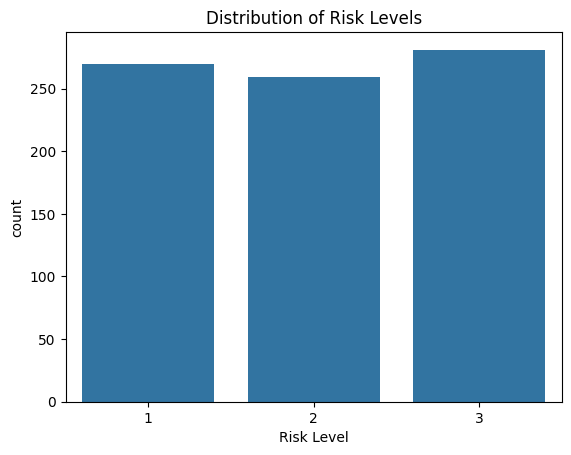

In [152]:
#This graph is used to show the count of the customers and their risk level 

sns.countplot(x='Risk Level', data=df) 
plt.title('Distribution of Risk Levels')
plt.show()

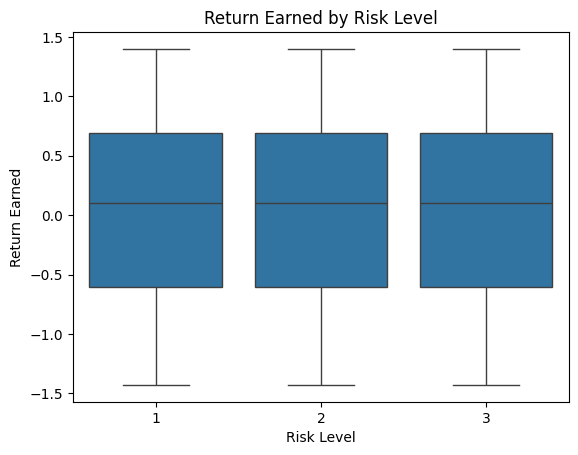

In [153]:
sns.boxplot(x='Risk Level', y='Return Earned', data=df)
plt.title('Return Earned by Risk Level')
plt.show()

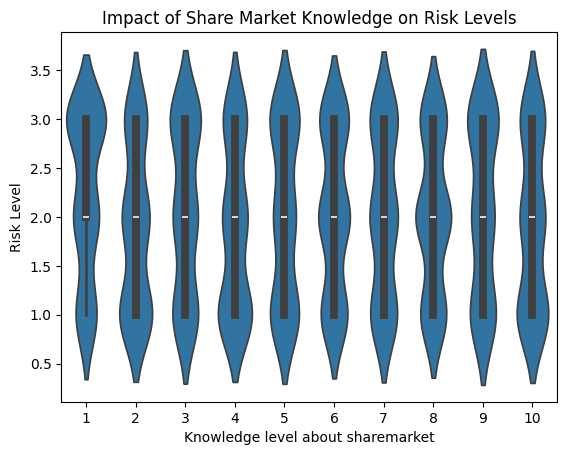

In [154]:
sns.violinplot(x='Knowledge level about sharemarket', y='Risk Level', data=df)
plt.title('Impact of Share Market Knowledge on Risk Levels')
plt.show()

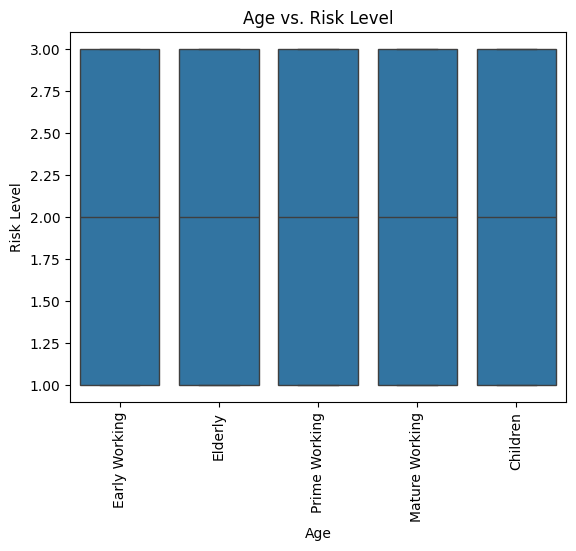

In [155]:
sns.boxplot(x='Age', y='Risk Level', data=df)
plt.title("Age vs. Risk Level")
plt.xticks(rotation=90)
plt.show()

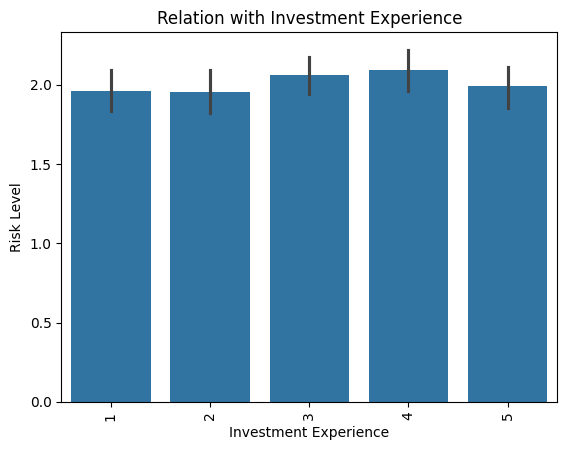

Risk Level,1,2,3
Investment Experience,,,
1,57,49,51
2,61,45,54
3,53,62,64
4,44,52,58
5,55,51,54


In [156]:
sns.barplot(x='Investment Experience', y='Risk Level', data=df)
plt.title('Relation with Investment Experience')
plt.xticks(rotation=90)
plt.show()
pd.crosstab(df['Investment Experience'], df['Risk Level'])


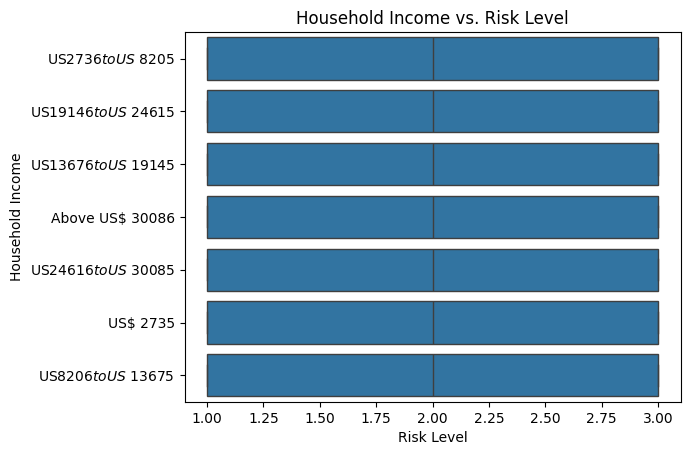

In [157]:
sns.boxplot(x='Risk Level', y='Household Income', data=df)
plt.title('Household Income vs. Risk Level')
plt.show()


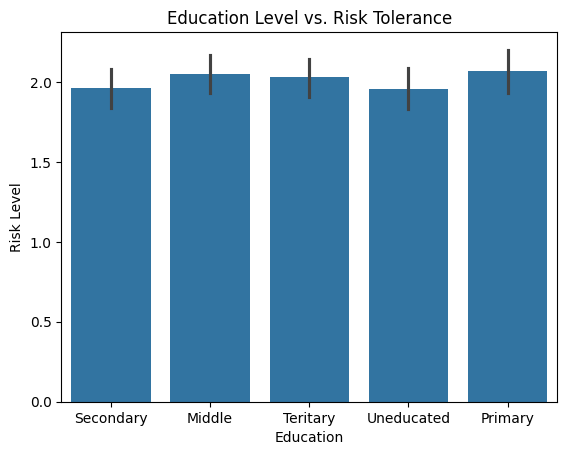

In [158]:
sns.barplot(x='Education', y='Risk Level', data=df)
plt.title('Education Level vs. Risk Tolerance')
plt.show()


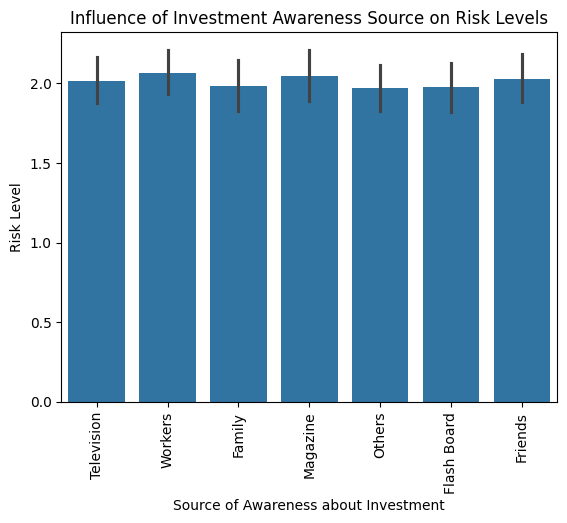

In [159]:
sns.barplot(x='Source of Awareness about Investment', y='Risk Level', data=df)
plt.title('Influence of Investment Awareness Source on Risk Levels')
plt.xticks(rotation=90)
plt.show()


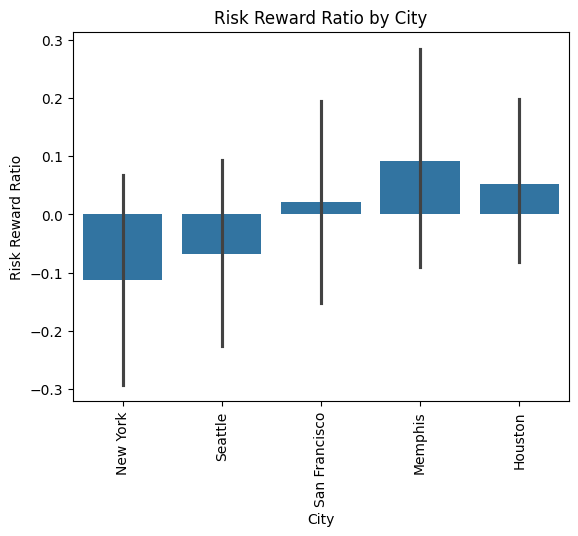

In [160]:
sns.barplot(x='City', y='Risk Reward Ratio', data=df)
plt.title('Risk Reward Ratio by City')
plt.xticks(rotation=90)
plt.show()


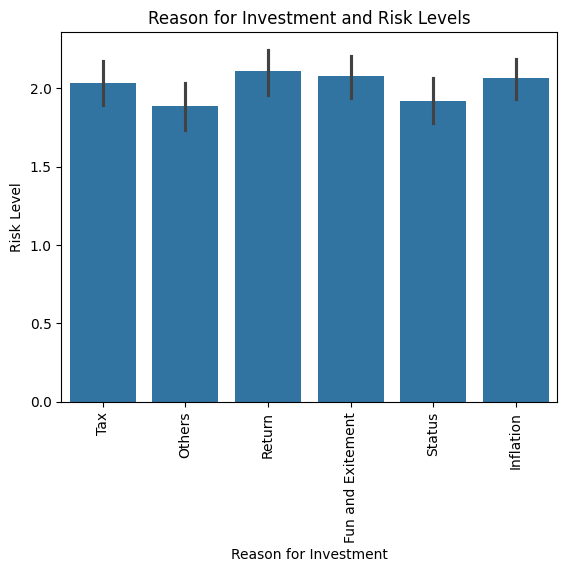

In [161]:
sns.barplot(x='Reason for Investment', y='Risk Level', data=df)
plt.title('Reason for Investment and Risk Levels')
plt.xticks(rotation=90)
plt.show()


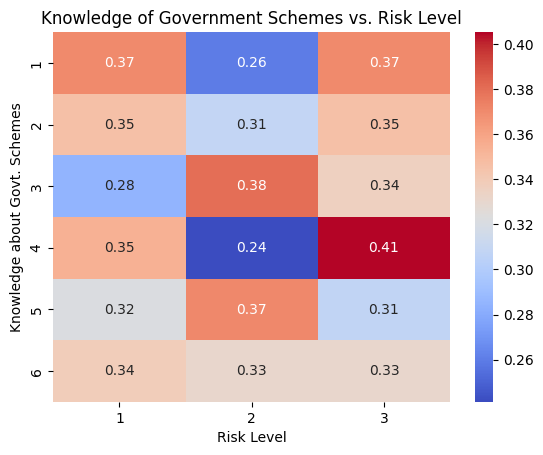

In [162]:
sns.heatmap(pd.crosstab(df['Knowledge about Govt. Schemes'], df['Risk Level'], normalize='index'), annot=True, cmap='coolwarm')
plt.title('Knowledge of Government Schemes vs. Risk Level')
plt.show()

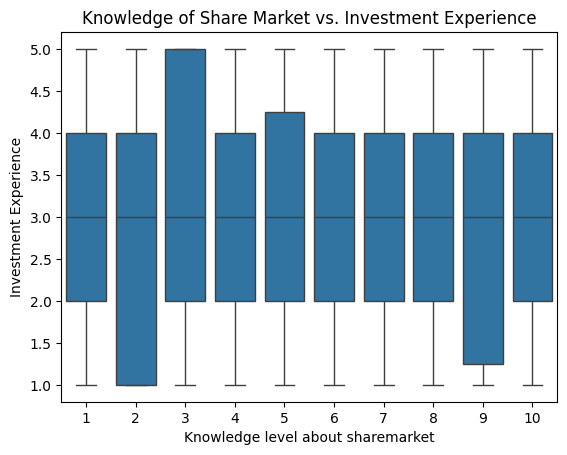

In [163]:
sns.boxplot(x='Knowledge level about sharemarket', y='Investment Experience', data=df)
plt.title('Knowledge of Share Market vs. Investment Experience')
plt.show()


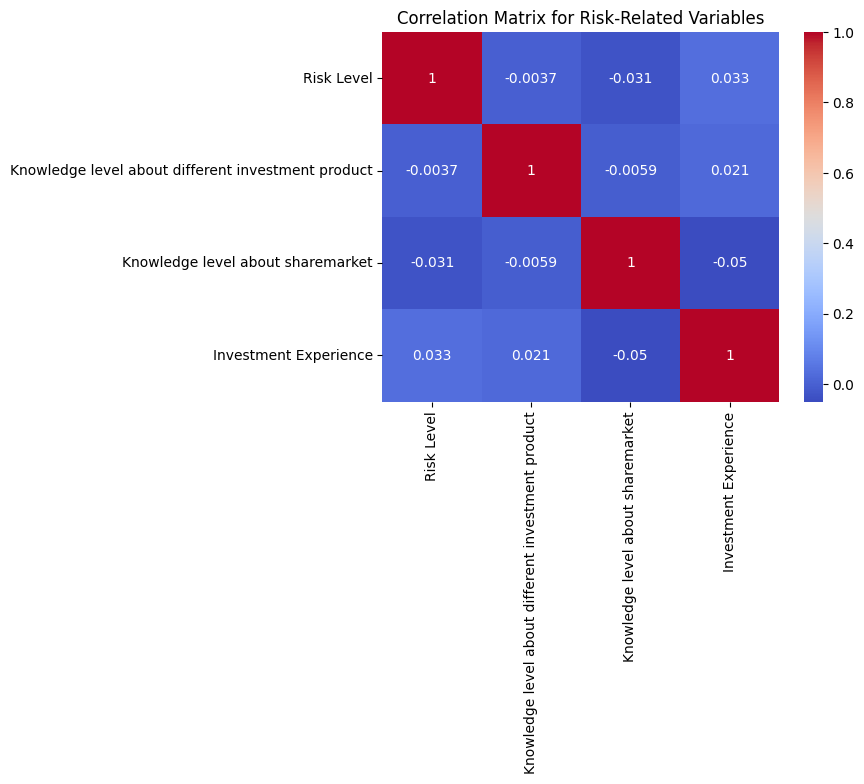

In [164]:
risk_related_cols = ['Risk Level', 'Knowledge level about different investment product', 
                     'Knowledge level about sharemarket', 'Investment Experience']
sns.heatmap(df[risk_related_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Risk-Related Variables')
plt.show()


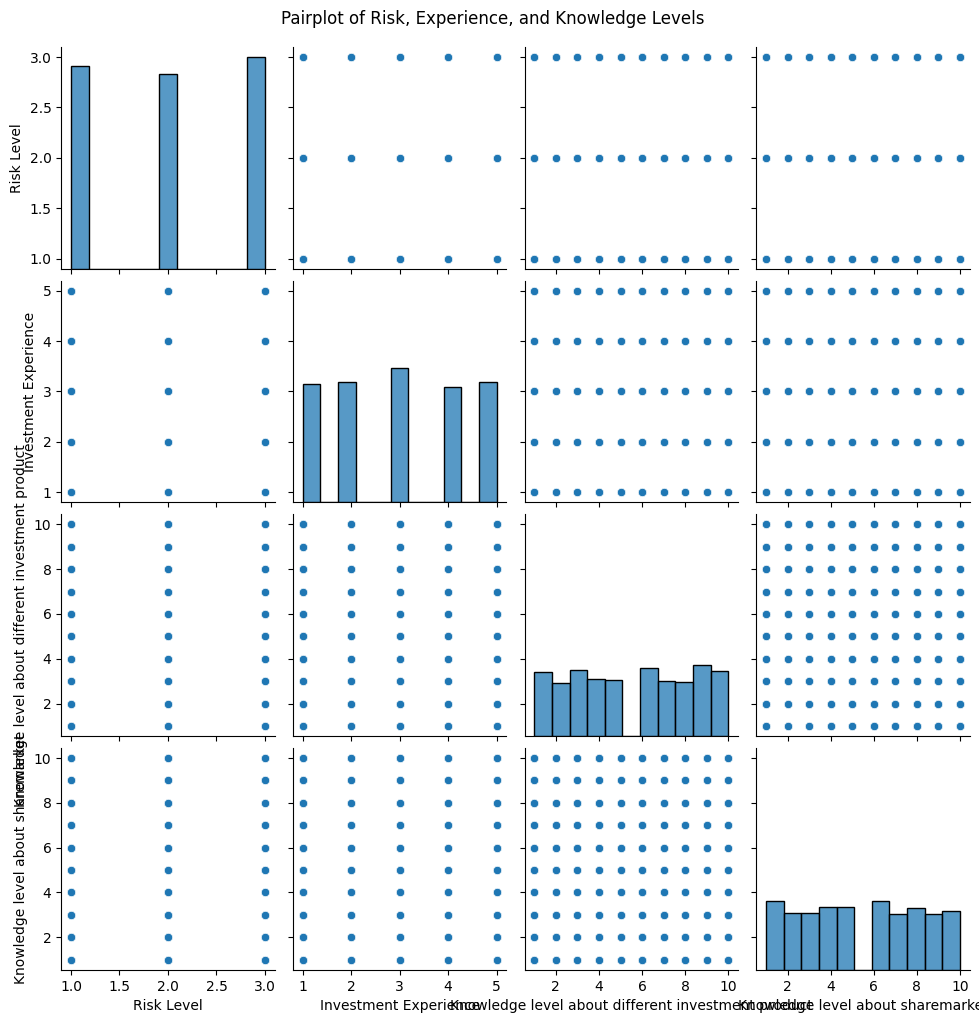

In [165]:
#doubt

sns.pairplot(df[['Risk Level', 'Investment Experience', 
                 'Knowledge level about different investment product', 
                 'Knowledge level about sharemarket']])
plt.suptitle('Pairplot of Risk, Experience, and Knowledge Levels', y=1.02)
plt.show()


In [166]:
#Experience vs Risk Level Alignment 

MODEL BUILDING

In [167]:
X = df.drop(columns=['Risk Level'])  # Features
y = df['Risk Level']  # Target

In [168]:
print("DataFrame shape:", df.shape)

# Check for empty DataFrame
if df.empty:
    raise ValueError("DataFrame is empty. Check preprocessing steps.")

# Example column names, adjust based on actual dataframe
X = df.drop(columns=['Risk Level'])  # Features
y = df['Risk Level']  # Target

# Check if there are sufficient samples
if len(df) < 10:
    raise ValueError("Not enough data samples for train-test split. Ensure your dataset has sufficient data.")

# Split the data into training and testing sets
# Adjust test_size if necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DataFrame shape: (810, 20)


In [169]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (648, 19)
Test set shape: (162, 19)


In [171]:
df = pd.read_csv('shortlist.csv')

# Specify categorical columns
categorical_features = ['City', 'Gender', 'Marital Status', 'Education', 'Role', 
                         'Source of Awareness about Investment', 'Investment Influencer', 
                         'Reason for Investment']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Apply one-hot encoding
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features]), 
                          columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenate with the original dataframe
df_transformed = pd.concat([df.drop(columns=categorical_features), df_encoded], axis=1)

# Check DataFrame
print(df_transformed.info())

# Prepare features and target
X = df_transformed.drop(columns=['Risk Level'])  # Exclude target variable if applicable
y = df_transformed['Risk Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 42 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   S. No.                                              810 non-null    int64  
 1   Age                                                 810 non-null    object 
 2   Number of investors in family                       810 non-null    int64  
 3   Household Income                                    810 non-null    object 
 4   Percentage of Investment                            810 non-null    object 
 5   Knowledge level about different investment product  810 non-null    int64  
 6   Knowledge level about sharemarket                   810 non-null    int64  
 7   Knowledge about Govt. Schemes                       810 non-null    int64  
 8   Investment Experience                               810 non-null    object 
 9  

ValueError: could not convert string to float: 'Prime Working'